The idea of this notebook is to convey some intuition of how to translate the topics we discus in class into coding. Namely the single layer perceptron model.

A perceptron is a basic artificial neuron. It takes in multiple binary inputs and produces a single binary output. The inputs are given weights and the output is determined by whether the sum of the input weights are over or under a certain threshold. Essentially, it is a device that makes decisions by weighing all the evidence.

Below we import some useful libraries for matrix manipulation (numpy), ploting (matplotlib), and general machine learning (sklearn). The sklearn package also provides some useful tools to create synthetic datasets as we can see below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification,load_iris

From a user's perspective, a neural network (NN) is a class of models $X_\text{out} = N(X_\text{in}; \Theta)$ that are:
 - **Generic:** they are not tailored to any particular application.
 - **Flexible:** they can accurately represent a wide range of non-linear $X_\text{in}\rightarrow X_\text{out}$ mappings with a suitable choice of parameters $\Theta$.
 - **Trainable:** a robust optimization algorithm (backpropagation) can learn parameters $\Theta$ given enough training data $D = (X_\text{in},Y_\text{tgt})$.
 - **Modular:** it is straightforward to scale the model complexity (and number of parameters) to match the available training data.
 - **Efficient:** most of the internal computations are linear and amenable to parallel computation and hardware acceleration.

#### Building Block

The internal structure of a NN is naturally described by a computation graph that connects simple building blocks. The basic building-block unit is a function of $D$ input features $x_i$,
$$
f(\mathbf{x}) = \phi\left(\mathbf{x}\cdot\mathbf{w} + b\right)
$$
with $D+1$ parameters consisting of $D$ **weights** $w_i$ and a single **bias** $b$.
The recipe for obtaining the output value is then:
 - propagate each input value $x_i$ with a strength $w_i$,
 - sum the values $x_i w_i$,
 - apply the activation $\phi$.

Note that this building block is mostly linear, except for the **activation function** $\phi(s)$.

The building-block equation is straightfoward to implement as code:

In [ ]:
def nn_unit(x, w, b, phi):
    return phi(np.dot(x, w) + b)

Note that in the equation above I did not tell who phi is. The function requires us to define the activation of our choice.

Below I can define a customized activation function of my choice, as e.g. the step function.

In [ ]:
def step(z):
    return np.where(z >= 0, 1, 0)

Let's text if our function is behaving as we expect.

In [ ]:
step(-1)

array(0)

Let's check if our perceptron function is doing the calculations right. Try to reproduce the same calculation by hand and compare the results. This is the same exercise we did in class.

In [ ]:
x = np.array([0, 1, -1])
w = np.array([1, 2, 3])
b = -1

In [ ]:
output = nn_unit(x, w, b, step)
print("Output:", output)

Output: 0


# Exercise, try to implement your own function for the perceptron and generalize for 2 dimensions.

The step function is just one option among many activation functions, below we define others.

#### Activation Functions

The activation function $\phi$ argument $s$ is always a scalar and, by convention, activation functions are always defined in a standard form, without any parameters (since $\mathbf{w}$ and $b$ already provide enough learning flexibility).

Some popular activations are defined below (using [lambda functions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)).

Let's try our function again in a different activation now.

In [ ]:
relu = lambda s: np.maximum(0, s)

elu = lambda s: np.where(s > 0, s, (np.exp(s) - 1)) # This is another way of writing the ELU

softplus = lambda s: np.log(1 + np.exp(s))

sigmoid = lambda s: 1 / (1 + np.exp(-s))

tanh = lambda s: np.tanh(s)

softsign = lambda s: s / (np.abs(s) + 1)

heaviside = lambda s: np.where(s < 0, 0, 1)

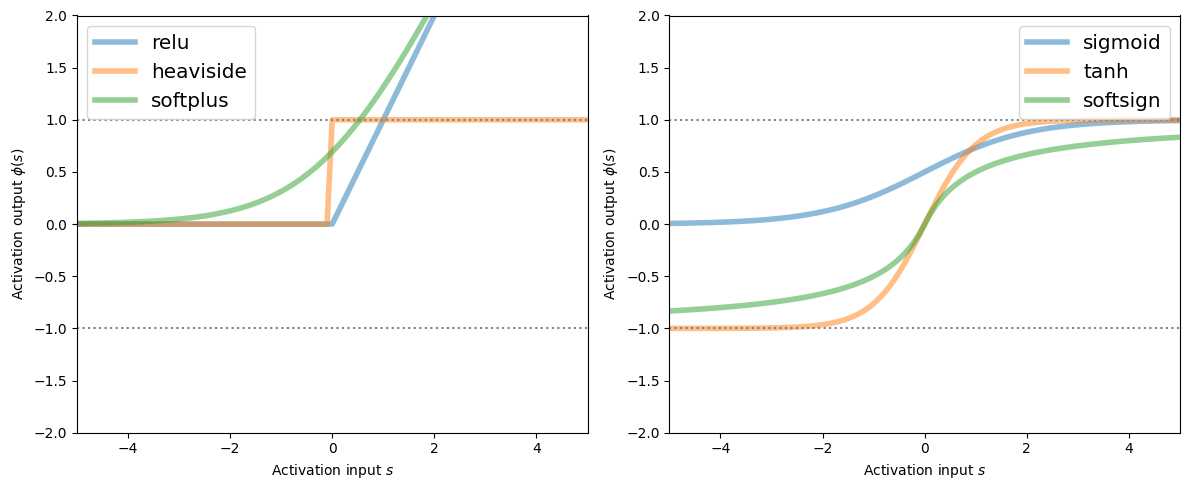

In [ ]:
def plot_activations(ax, names, s_range=5, y_range=2):
    s = np.linspace(-s_range, +s_range, 101)
    for name in names.split(','):
        phi = eval(name)
        ax.plot(s, phi(s), lw=4, alpha=0.5, label=name)
    ax.legend(fontsize='x-large')
    ax.set_xlabel('Activation input $s$')
    ax.set_ylabel('Activation output $\phi(s)$')
    ax.set_xlim(-s_range, +s_range)
    ax.set_ylim(-y_range, +y_range)
    ax.axhline(-1, c='gray', ls=':')
    ax.axhline(+1, c='gray', ls=':')

_, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_activations(ax[0], 'relu,heaviside,softplus')
plot_activations(ax[1], 'sigmoid,tanh,softsign')
plt.tight_layout()

In [ ]:
# Let's try one possible activation, play with the functions and see how it behaves
nn_unit(x, w, b, phi=np.tanh)

-0.9640275800758169

## Below, we show how to create a fitting procedure from scratch, hardly you will need to do it on real life. But it's important to build intuition.

In [ ]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01):
        self.weight = np.random.rand()  # Initialize the weight randomly
        self.learning_rate = learning_rate
        self.weight_history = []  # To track weight evolution
        print(f"Initial weight: {self.weight}")

    def predict(self, x):
        return x * self.weight


    def train(self, x_train, y_train, epochs):
        for epoch in range(epochs):
            for x, y_true in zip(x_train, y_train):
                y_pred = self.predict(x)
                self.weight += self.learning_rate * (y_true - y_pred) * x
                self.weight_history.append(self.weight)  # Store weight after each update
                print(f"Epoch {epoch}, Updated weight: {self.weight}")



In [ ]:
# Example usage
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 6, 8, 10])  # Example linear relationship

In [ ]:
perceptron = SingleLayerPerceptron(learning_rate=0.01)
perceptron.train(x_train, y_train, epochs=20)  # Reduced epochs for brevity


Initial weight: 0.28489593709027894
Epoch 0, Updated weight: 0.30204697771937616
Epoch 0, Updated weight: 0.3699650986106011
Epoch 0, Updated weight: 0.516668239735647
Epoch 0, Updated weight: 0.7540013213779435
Epoch 0, Updated weight: 1.0655009910334576
Epoch 1, Updated weight: 1.074845981123123
Epoch 1, Updated weight: 1.1118521418781981
Epoch 1, Updated weight: 1.1917854491091604
Epoch 1, Updated weight: 1.3210997772516948
Epoch 1, Updated weight: 1.4908248329387712
Epoch 2, Updated weight: 1.4959165846093836
Epoch 2, Updated weight: 1.5160799212250082
Epoch 2, Updated weight: 1.5596327283147575
Epoch 2, Updated weight: 1.6300914917843963
Epoch 2, Updated weight: 1.7225686188382971
Epoch 3, Updated weight: 1.7253429326499141
Epoch 3, Updated weight: 1.7363292153439176
Epoch 3, Updated weight: 1.760059585962965
Epoch 3, Updated weight: 1.7984500522088906
Epoch 3, Updated weight: 1.848837539156668
Epoch 4, Updated weight: 1.8503491637651013
Epoch 4, Updated weight: 1.8563351972144972

In [ ]:
# Test the model
print(f"Final predicted value for 7: {perceptron.predict(20)}")  # Should be close to 12 for linear relationship

Final predicted value for 7: 39.99981757352784


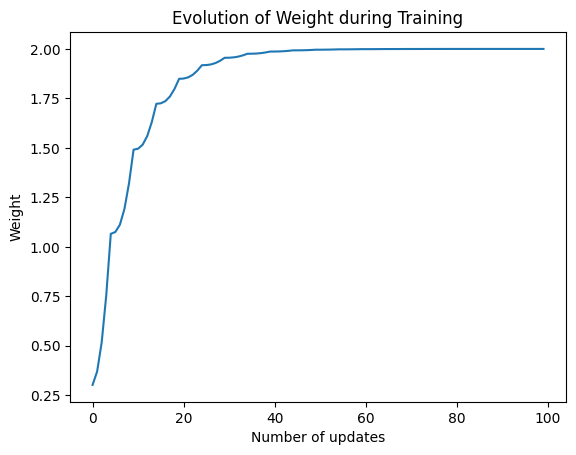

In [ ]:
# Plotting the weight evolution
plt.plot(perceptron.weight_history)
plt.xlabel('Number of updates')
plt.ylabel('Weight')
plt.title('Evolution of Weight during Training')
plt.show()

In [ ]:
# Create datasets
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, class_sep=2.0, n_samples=300)
X2, Y2 = make_moons(n_samples=200, noise=0.1)

Text(0.5, 1.0, 'Scatter Plot of Dataset 1')

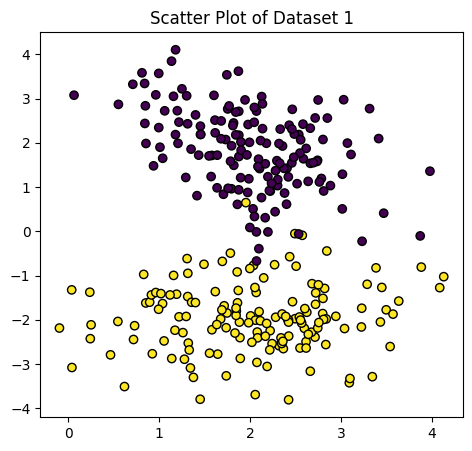

In [ ]:
# Create scatter plot for X1, Y1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap='viridis', edgecolors='k')
plt.title("Scatter Plot of Dataset 1")

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Get predictions
    ab = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(ab)

    # Reshape predictions for contour plot
    cc = pred.reshape(xx.shape)

    ax.contourf(xx, yy, cc, cmap='viridis', alpha=0.2)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

In [ ]:
from sklearn.linear_model import Perceptron

# Create and fit the perceptron model for the first dataset
perceptron1 = Perceptron()
perceptron1.fit(X1, Y1)


Perceptron()

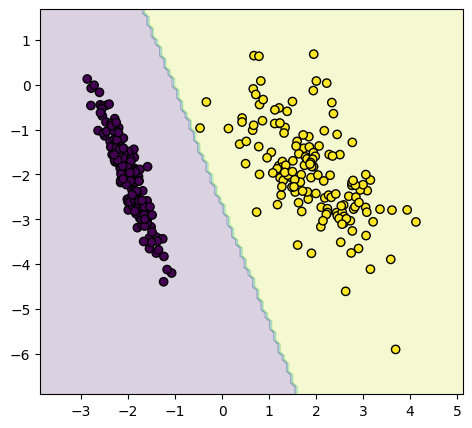

In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(perceptron1, X1, Y1, ax1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
import tensorflow as tf

In [ ]:
# Create single layer perceptron
slp = Sequential()
slp.add(Dense(1, input_shape=(2,), activation='sigmoid'))
slp.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])

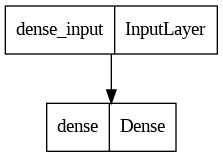

In [ ]:
plot_model(slp)

In [ ]:
slp.fit(X1, Y1, epochs=100, verbose=0)

319/319 [==============================] - 0s 1ms/step


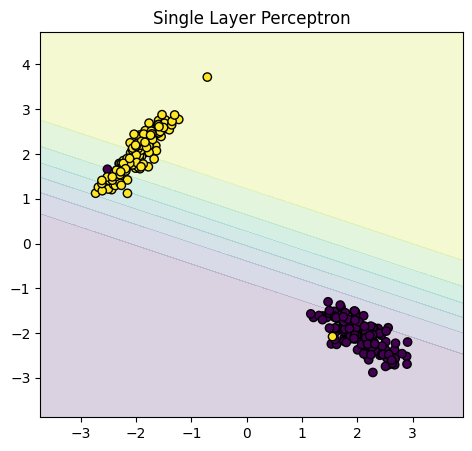

In [ ]:
plt.figure(figsize=(12, 5))
ax0 = plt.subplot(1, 2, 1)
# Plot for linearly separable data
ax0.set_title('Single Layer Perceptron')
plot_decision_boundary(slp, X1, Y1, ax0)
plt.show()

# Exercise

## Explore the sklearn package, set-up a simple experiment with your own dataset and compare the results from Perceptrons againts off the shelf models, like Random Forest.